In [322]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data_raw = pd.read_csv("point_survey_v1.csv")

Data from Columns explanation file, the table with crop names is put to separate csv file: CropsDict.csv

In [323]:
data_crops_dict = pd.read_csv("CropsDict.csv")
data_crops_dict.head()

,LC_CategoryID,LC_CategoryName,LC_GroupID,LC_GroupName,LC_CodeId,LC_CodeName
0,B,Arable land,B1,Cereal crops,B101,Rice - Early paddy
1,B,Arable land,B1,Cereal crops,B102,Rice - Main paddy
2,B,Arable land,B1,Cereal crops,B103,Rice - Upland paddy
3,B,Arable land,B1,Cereal crops,B104,Wheat
4,B,Arable land,B1,Cereal crops,B105,Maize - Spring/winter


In [324]:
data = pd.merge(data_raw,data_crops_dict , left_on='lc_code1', right_on='LC_CodeId', sort=False)
data.head()

,district,segment_id,point_id,point_code,su_id,su_date,su_date_year,su_date_month,su_date_day,start_time,...,remarks,entry_loc,entry_loc_qualifier,end_time,LC_CategoryID,LC_CategoryName,LC_GroupID,LC_GroupName,LC_CodeId,LC_CodeName
0,42,621,1,42-621-1,D2,10/11/2016,2016,11,10,15:40,...,NaN,1,NaN,15:43,B,Arable land,B4,Oil seeds,B401,Mustard seeds
1,42,1449,1,42-1449-1,D2,08/11/2016,2016,11,8,16:13,...,NaN,1,NaN,16:15,B,Arable land,B4,Oil seeds,B401,Mustard seeds
2,42,1449,2,42-1449-2,D2,08/11/2016,2016,11,8,15:54,...,NaN,1,NaN,15:56,B,Arable land,B4,Oil seeds,B401,Mustard seeds
3,42,1583,1,42-1583-1,D2,09/11/2016,2016,11,9,08:36,...,NaN,1,NaN,08:38,B,Arable land,B4,Oil seeds,B401,Mustard seeds
4,42,4503,4,42-4503-4,F1,04/11/2016,2016,11,4,11:21,...,NaN,1,NaN,11:24,B,Arable land,B4,Oil seeds,B401,Mustard seeds


In [331]:
threshold = 50
df = data.groupby(['LC_CodeName']).count()
df1 = df[df['point_id'] > threshold]
df1.head()

,district,segment_id,point_id,point_code,su_id,su_date,su_date_year,su_date_month,su_date_day,start_time,...,photo,remarks,entry_loc,entry_loc_qualifier,end_time,LC_CategoryID,LC_CategoryName,LC_GroupID,LC_GroupName,LC_CodeId
LC_CodeName,,,,,,,,,,,,,,,,,,,,,
Forest,81,81,81,81,81,81,81,81,81,81,...,75,6,81,0,81,81,81,81,81,81
Maize - Summer,98,98,98,98,98,98,98,98,98,98,...,92,2,98,0,98,98,98,98,98,98
Mustard seeds,125,125,125,125,125,125,125,125,125,125,...,119,6,125,0,125,125,125,125,125,125
Permanent grassland with sparse tree/shrub cover,60,60,60,60,60,60,60,60,60,60,...,55,6,60,0,60,60,60,60,60,60
Permanent grassland without tree/shrub cover,96,96,96,96,96,96,96,96,96,96,...,86,7,96,0,96,96,96,96,96,96


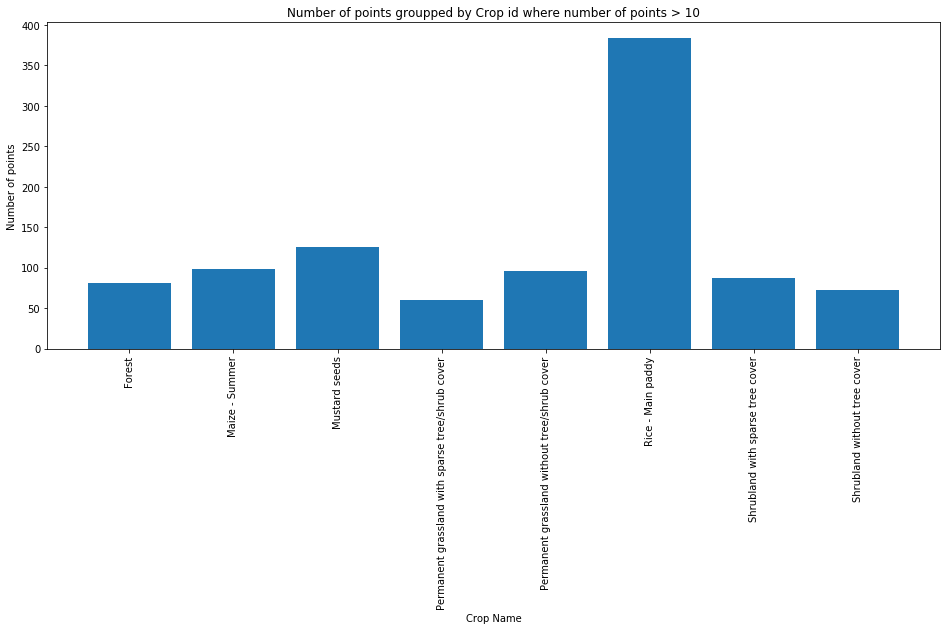

In [332]:
plt.rcParams["figure.figsize"] = [16,6]
plt.bar(df1.index.values.tolist(), df1['point_id'].values.tolist())
plt.xlabel('Crop Name')
plt.xticks(rotation='vertical')
plt.ylabel('Number of points')
plt.title('Number of points groupped by Crop id where number of points > 10')
plt.show()

In [333]:
df2 = data[data['LC_CodeName'].isin(df1.index.values.tolist())]

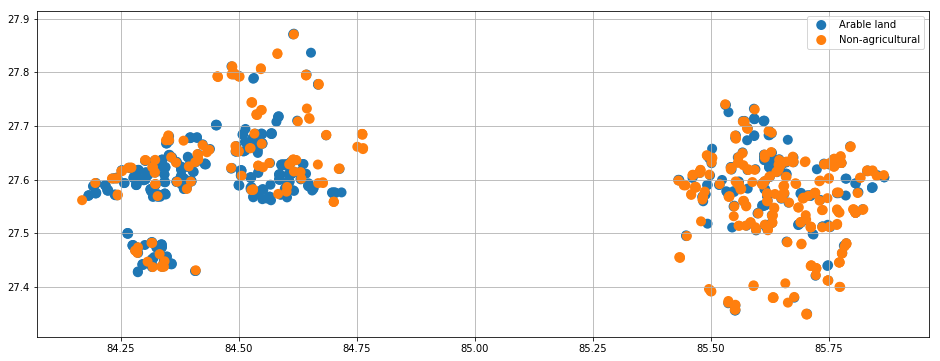

In [339]:
fig, ax = plt.subplots()
for category in df2['LC_CategoryName'].unique():
    frame = df2[df2['LC_CategoryName']==category]
    ax.scatter(frame['coord_obs_x'], frame['coord_obs_y'], label=category, lw=1, s=100, edgecolors='none')
    
ax.legend()
ax.grid(True)

plt.show()

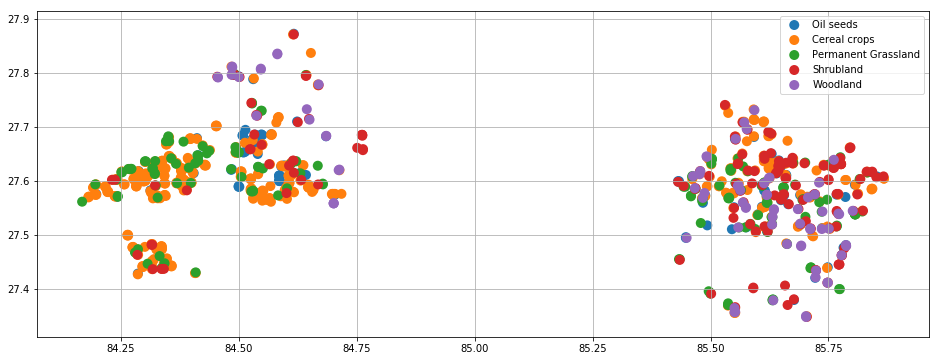

In [338]:
fig, ax = plt.subplots()
for category in df2['LC_GroupName'].unique():
    frame = df2[df2['LC_GroupName']==category]
    ax.scatter(frame['coord_obs_x'], frame['coord_obs_y'], label=category, lw=1, s=100, edgecolors='none')
    
ax.legend()
ax.grid(True)

plt.show()

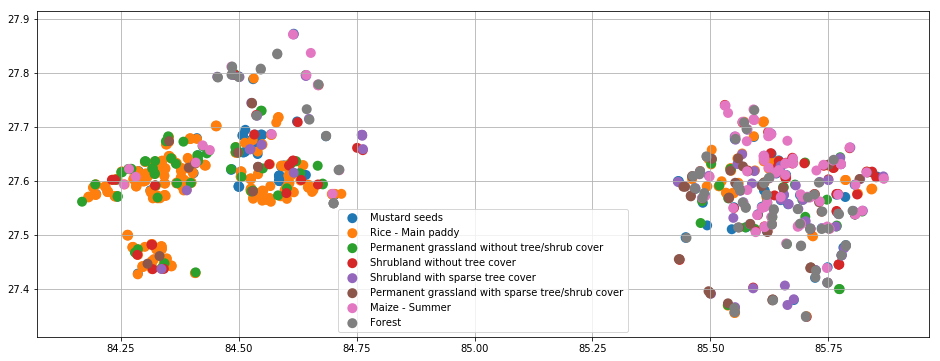

In [337]:
# crop_names = dict()
# l = df2['LC_CodeName'].unique()
# for i in range(len(l)):
#     crop_names[l[i]] = i
# labels = [crop_names[x] for x in df2['LC_CodeName'].values.tolist()]

# plt.figure( figsize=(16,12))
# plt.scatter(df2['coord_obs_x'], df2['coord_obs_y'], c=labels, edgecolor='black', lw=1, s=100, cmap=plt.get_cmap('viridis'))
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.title('Points distribution in X,Y space by Crops Groups')
# plt.show()
fig, ax = plt.subplots()
for category in df2['LC_CodeName'].unique():
    frame = df2[df2['LC_CodeName']==category]
    ax.scatter(frame['coord_obs_x'], frame['coord_obs_y'], lw=1, s=100, label=category, edgecolors='none')
    
ax.legend()
ax.grid(True)

plt.show()